In [11]:
import pandas as pd

In [58]:
df = pd.read_csv('voice.csv',header=0)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [60]:
df.shape

(3168, 21)

In [61]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [62]:
# One hot encoding for lable column 
data = pd.get_dummies(data=df, columns=['label'])
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_female,label_male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0,1


In [63]:
x =data.iloc[:,:20]
#y=data.iloc[:,20:]
y= data.iloc[:,20]


In [88]:
#Train-test Split
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2)
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.20, random_state=5)

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/home/shubhamkumar/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
from sklearn import metrics
#lr.score(x_test,y_test)
y_pred=lr.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test)) # to check the accuracy

0.9006309148264984


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

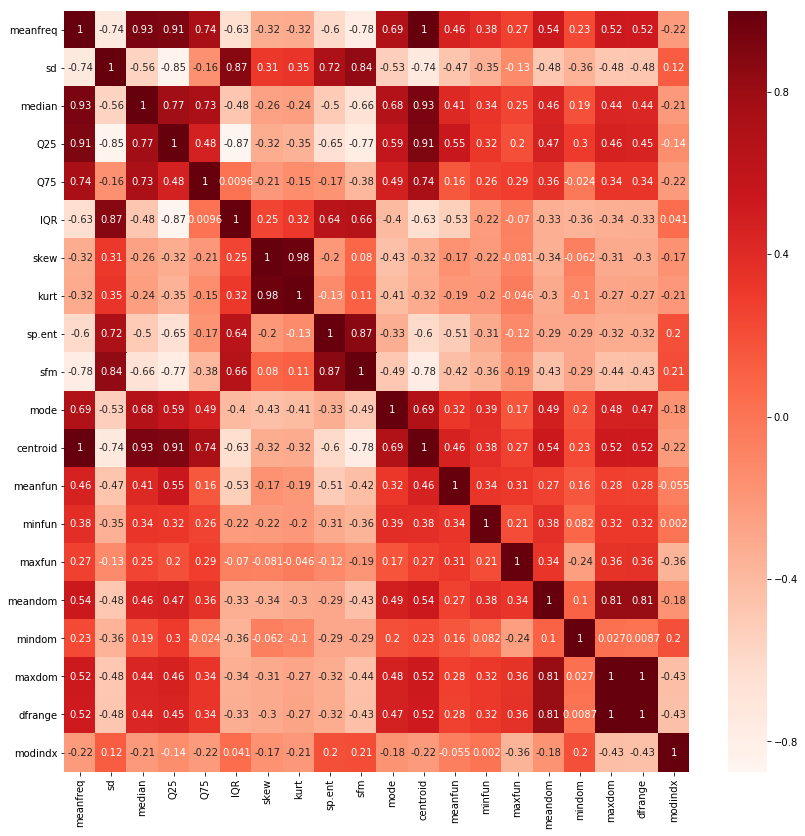

In [92]:
correlation_matrix = data.iloc[:,:-2].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
#sns.heatmap(corr, cbar = True,  square = True,
#            cmap= 'coolwarm')
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [93]:
correlated_features = set()

In [94]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [95]:
correlated_features = list(correlated_features)
correlated_features

['centroid', 'kurt', 'median', 'sfm', 'dfrange', 'IQR', 'Q25', 'maxdom']

In [96]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1963,0.121076,0.086413,0.140828,0.028718,0.197988,0.169270,1.589307,5.204647,0.950290,0.686228,0.005799,0.121076,0.166991,0.019632,0.271186,0.322917,0.015625,0.710938,0.695312,0.416595
2469,0.187363,0.069258,0.207822,0.188326,0.227319,0.038993,2.673879,11.517209,0.897503,0.449708,0.209481,0.187363,0.181871,0.047761,0.277457,1.690770,0.023438,12.023438,12.000000,0.146205
797,0.174646,0.063535,0.182973,0.116492,0.229989,0.113497,1.478088,4.895979,0.931257,0.541199,0.116492,0.174646,0.095960,0.016260,0.192771,0.311523,0.093750,2.468750,2.375000,0.138730
2172,0.180396,0.038610,0.178684,0.171579,0.195526,0.023947,4.356239,25.691814,0.837863,0.303458,0.173684,0.180396,0.169673,0.015984,0.238806,0.907407,0.156250,6.890625,6.734375,0.114849
2071,0.139408,0.080712,0.147872,0.075334,0.191718,0.116385,5.270517,68.571873,0.957538,0.711622,0.120504,0.139408,0.142514,0.016771,0.271186,0.358530,0.007812,3.476562,3.468750,0.100225


In [97]:
x_train.drop(labels=correlated_features, axis=1,inplace=True)
x_test.drop(labels=correlated_features, axis=1,inplace=True)

/home/shubhamkumar/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/home/shubhamkumar/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred=lr.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test)) # to check the accuracy

0.9037854889589906
